# K-means Clustering

k-means is one of the simplest unsupervised learning algorithms that solve the well known clustering problem. The procedure follows a simple and easy way to classify a given data set through a certain number of clusters (assume k clusters) fixed apriori. The main idea is to define k centers, one for each cluster.

# Clustering

Clustering is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different. In other words, we try to find homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a similarity measure such as euclidean-based distance or correlation-based distance. The decision of which similarity measure to use is application-specific.

Clustering analysis can be done on the basis of features where we try to find subgroups of samples based on features or on the basis of samples where we try to find subgroups of features based on samples. We’ll cover here clustering based on features. Clustering is used in market segmentation; where we try to find customers that are similar to each other whether in terms of behaviors or attributes, image segmentation/compression; where we try to group similar regions together, document clustering based on topics, etc.

# Kmeans Algorithm

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

In [3]:
# Required library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [4]:
from sklearn.datasets.samples_generator import make_blobs
X,y_true= make_blobs(n_samples=300,centers=4,cluster_std= 0.60,random_state=0)


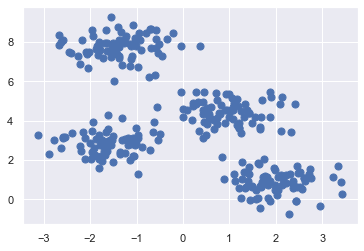

In [6]:
plt.scatter(X[:, 0],X[:, 1],s=50);

In [28]:
from sklearn.cluster import KMeans


In [30]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)
y_kmeans

array([3, 1, 0, 1, 3, 3, 2, 0, 1, 1, 2, 1, 0, 1, 3, 0, 0, 3, 2, 2, 3, 3,
       0, 2, 2, 0, 3, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 3, 0, 2, 0, 0,
       2, 2, 1, 2, 1, 3, 2, 3, 1, 3, 3, 2, 1, 2, 1, 3, 1, 0, 1, 2, 2, 2,
       1, 3, 1, 2, 0, 2, 1, 2, 2, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 3, 0,
       1, 1, 0, 3, 1, 2, 2, 0, 3, 3, 0, 2, 1, 3, 1, 3, 0, 3, 3, 0, 1, 0,
       2, 2, 3, 1, 3, 0, 1, 3, 3, 0, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 1, 2,
       2, 3, 1, 2, 2, 1, 0, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0,
       3, 2, 1, 2, 3, 0, 1, 0, 0, 3, 0, 2, 2, 0, 3, 0, 0, 1, 3, 0, 2, 1,
       3, 3, 0, 2, 3, 0, 2, 2, 0, 0, 0, 0, 3, 1, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 1, 0, 2, 3, 2, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 2, 2, 3, 3, 0,
       1, 3, 3, 2, 3, 2, 0, 1, 1, 0, 0, 1, 0, 3, 2, 0, 3, 2, 1, 2, 3, 0,
       3, 1, 1, 1, 1, 2, 2, 1, 0, 2, 3, 0, 2, 2, 2, 3, 3, 1, 0, 0, 2, 3,
       1, 2, 0, 1, 0, 3, 3, 2, 2, 0, 3, 3, 3, 0, 1, 1, 3, 3, 0, 3, 3, 3,
       1, 2, 1, 0, 3, 3, 1, 1, 1, 3, 3, 0, 1, 2])

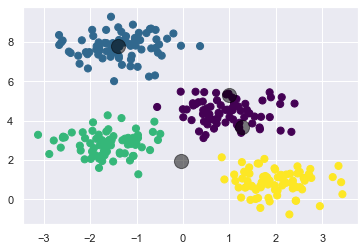

In [40]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X,n_clusters,rseed=2):
    # 1- Randomly choose cluster
    rng= np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers= X[i]
    
    while True:
        #2a- Assign labels based on closest center
        labels= pairwise_distances_argmin(X,centers)
        #2b- Find new centers from means of points
        new_centers = np.array([X[labels==i].mean(0)
                               for i in range(n_clusters)])
        #2c- Check for convergence 
        
        
        if np.all(centers==new_centers):
            break
            
        centers= new_centers
        return centers,labels
centers,labels= find_clusters(X,4)
plt.scatter(X[:, 0],X[:, 1],c=y_kmeans,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5);